In [1]:
import tensorflow as tf
from keras import layers, models, regularizers
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("C:\\AmaruAyelen\\proyectos\\PythonDataScienceMachineLearning\\PythonDataScienceMachineLearning\\bootcampIA\\RedesANN\\Concrete_Data.xls")

In [4]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:

print(df.isnull().sum())

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [7]:
# Separar las características (X) de la etiqueta (y)
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [8]:
# Dividir los datos en conjuntos de entrenamiento (90%) y prueba (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)

# Dividir el 90% restante en entrenamiento (80%) y validación (20%)
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_temp = scaler.transform(X_temp)

In [11]:
# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Capa de salida para regresión

# Compilar el modelo
model.compile(optimizer='adam', 
              loss='mean_absolute_error', 
              metrics=['mean_squared_error'])

In [12]:
# Entrenar el modelo (usando el conjunto de validación)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 36.0840 - mean_squared_error: 1610.2462 - val_loss: 34.4866 - val_mean_squared_error: 1470.7318
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.2858 - mean_squared_error: 1458.9326 - val_loss: 32.0520 - val_mean_squared_error: 1307.2937
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.7120 - mean_squared_error: 1228.6357 - val_loss: 27.6923 - val_mean_squared_error: 1041.5217
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.4792 - mean_squared_error: 1009.1783 - val_loss: 21.6292 - val_mean_squared_error: 697.6181
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.3312 - mean_squared_error: 636.8010 - val_loss: 15.1067 - val_mean_squared_error: 388.6546
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.7534 - mean_squared_error: 317.7721 - val_loss: 12.5146 - val_mean_squared_error: 261.7948
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.5543 - mean_s

In [13]:
# Evaluar el modelo, ver el error absoluto medio (MAE) y la pérdida (MSE).
loss, mae = model.evaluate(X_test, y_test)
print(f'MAE: {mae:.2f}, MSE: {loss:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8669 - mean_squared_error: 29.1883
MAE: 31.18, MSE: 3.98


In [14]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_mse = model.evaluate(X_test, y_test)
print(f'Test Loss (MAE): {test_loss}')
print(f'Test MSE: {test_mse}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8669 - mean_squared_error: 29.1883
Test Loss (MAE): 3.9775609970092773
Test MSE: 31.1826171875


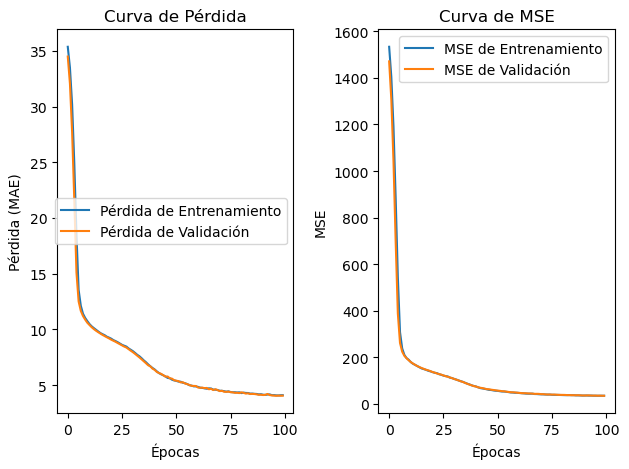

In [17]:
# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MAE)')
plt.legend()

# Curva de MSE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label='MSE de Entrenamiento')
plt.plot(history.history['val_mean_squared_error'], label='MSE de Validación')
plt.title('Curva de MSE')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Evaluar el modelo en el conjunto temporal (10%)
test_loss, test_mse = model.evaluate(X_temp, y_temp)
print(f'Test MAE: {test_loss:.2f}')
print(f'Test MSE: {test_mse:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6147 - mean_squared_error: 35.7024
Test MAE: 4.40
Test MSE: 34.08


In [20]:
# Hacer predicciones en el conjunto temporal
predictions = model.predict(X_temp)

# Imprimir algunas de las predicciones y los valores reales
for i in range(5):  # Imprimir las primeras 5 predicciones
    print(f'Predicción: {predictions[i][0]:.2f}, Real: {y_temp.iloc[i]:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicción: 38.67, Real: 52.91
Predicción: 42.29, Real: 55.90
Predicción: 62.90, Real: 74.50
Predicción: 38.44, Real: 35.30
Predicción: 11.88, Real: 10.54
